## Agregación de datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gender = ['Male', 'Female']
income = ['Poor', 'Middle Class', 'Rich']

In [4]:
n = 500

gender_data = []
income_data = []

for i in range(0, n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))
    

In [5]:
gender_data[1:10]

['Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female']

In [6]:
income_data[1:10]

['Rich',
 'Middle Class',
 'Poor',
 'Middle Class',
 'Rich',
 'Rich',
 'Middle Class',
 'Poor',
 'Rich']

In [7]:
# Más variables con su respectiva dispersión +/-

# N(mean, sd) = mean + sd * Z(0,1)

height = 160 + 30*np.random.randn(n)
weight = 65 + 25*np.random.randn(n)
age = np.round(30 + 12*np.random.randn(n) )
income = 18000 + 3500*np.random.randn(n)

In [8]:
data = pd.DataFrame(
    {
        'Gender Data': gender_data,
        'Social Status': income_data,
        'Height': height,
        'Weight': weight,
        'Age': age,
        'Income': income
    }
)

In [9]:
data.head()

,Gender Data,Social Status,Height,Weight,Age,Income
0,Female,Middle Class,203.169661,43.762294,44.0,22840.576617
1,Female,Rich,184.927052,33.419614,28.0,18973.923695
2,Male,Middle Class,182.021515,70.723484,31.0,21852.028624
3,Male,Poor,160.226086,30.771667,42.0,22101.820713
4,Female,Middle Class,207.571250,108.700513,28.0,18341.146636


## Agrupación de datos

Agrupar variable por categoría.

In [10]:
grouped_gender = data.groupby('Gender Data')

In [11]:
grouped_gender.groups

{'Female': Int64Index([  0,   1,   4,   7,   8,   9,  11,  13,  14,  16,
             ...
             479, 481, 484, 485, 488, 491, 493, 494, 496, 499],
            dtype='int64', length=228),
 'Male': Int64Index([  2,   3,   5,   6,  10,  12,  15,  18,  19,  24,
             ...
             482, 483, 486, 487, 489, 490, 492, 495, 497, 498],
            dtype='int64', length=272)}

In [12]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
    Gender Data Social Status      Height      Weight   Age        Income
0        Female  Middle Class  203.169661   43.762294  44.0  22840.576617
1        Female          Rich  184.927052   33.419614  28.0  18973.923695
4        Female  Middle Class  207.571250  108.700513  28.0  18341.146636
7        Female  Middle Class  158.413351   52.141092  28.0  18310.009796
8        Female          Poor  168.159596   54.202971  27.0  11156.320380
..          ...           ...         ...         ...   ...           ...
491      Female  Middle Class  122.080728   42.410209  30.0  12926.219517
493      Female  Middle Class  160.270189   81.343510  18.0  14587.614185
494      Female  Middle Class  128.664183   76.969572  39.0  20413.784845
496      Female          Rich  146.308566   44.657406  27.0  17839.309500
499      Female  Middle Class  162.360943   70.423924  48.0  17344.425445

[228 rows x 6 columns]
Male
    Gender Data Social Status      Height      Weight   Age        Income
2 

In [13]:
# Conseguir un solo grupo
grouped_gender.get_group('Female')

,Gender Data,Social Status,Height,Weight,Age,Income
0,Female,Middle Class,203.169661,43.762294,44.0,22840.576617
1,Female,Rich,184.927052,33.419614,28.0,18973.923695
4,Female,Middle Class,207.571250,108.700513,28.0,18341.146636
7,Female,Middle Class,158.413351,52.141092,28.0,18310.009796
8,Female,Poor,168.159596,54.202971,27.0,11156.320380
...,...,...,...,...,...,...
491,Female,Middle Class,122.080728,42.410209,30.0,12926.219517
493,Female,Middle Class,160.270189,81.343510,18.0,14587.614185
494,Female,Middle Class,128.664183,76.969572,39.0,20413.784845
496,Female,Rich,146.308566,44.657406,27.0,17839.309500


Gender era sólo una categoría, también se pueden hacer agrupaciones de más de una categoría.

In [14]:
double_group = data.groupby(['Gender Data', 'Social Status'])

In [15]:
# Número de grupos
len(double_group)

6

In [16]:
# 6 grupos
double_group.groups

{('Female',
  'Middle Class'): Int64Index([  0,   4,   7,  13,  23,  40,  42,  46,  49,  75,  78,  83,  95,
             103, 104, 105, 108, 115, 117, 130, 131, 137, 142, 145, 149, 150,
             153, 155, 156, 160, 164, 197, 204, 215, 216, 219, 232, 245, 249,
             258, 263, 272, 275, 276, 279, 283, 287, 299, 303, 305, 329, 333,
             338, 342, 344, 354, 363, 364, 365, 384, 390, 394, 398, 402, 407,
             408, 435, 437, 450, 458, 461, 465, 466, 474, 491, 493, 494, 499],
            dtype='int64'),
 ('Female',
  'Poor'): Int64Index([  8,  14,  16,  22,  30,  38,  39,  48,  50,  54,  61,  62,  66,
              68,  70,  72,  85,  86,  98, 101, 111, 112, 120, 125, 127, 141,
             148, 152, 158, 162, 165, 169, 177, 180, 190, 191, 201, 205, 211,
             221, 226, 236, 241, 247, 251, 257, 266, 271, 274, 285, 298, 307,
             312, 320, 322, 323, 326, 327, 328, 340, 341, 346, 348, 350, 353,
             358, 362, 366, 370, 378, 387, 399, 424, 427, 432

In [17]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
    Gender Data Social Status      Height      Weight   Age        Income
0        Female  Middle Class  203.169661   43.762294  44.0  22840.576617
4        Female  Middle Class  207.571250  108.700513  28.0  18341.146636
7        Female  Middle Class  158.413351   52.141092  28.0  18310.009796
13       Female  Middle Class  126.338733  108.322393  35.0  21747.353087
23       Female  Middle Class  148.445789   69.878124  43.0  20888.391253
..          ...           ...         ...         ...   ...           ...
474      Female  Middle Class  219.833611   62.355350  44.0  15254.175324
491      Female  Middle Class  122.080728   42.410209  30.0  12926.219517
493      Female  Middle Class  160.270189   81.343510  18.0  14587.614185
494      Female  Middle Class  128.664183   76.969572  39.0  20413.784845
499      Female  Middle Class  162.360943   70.423924  48.0  17344.425445

[78 rows x 6 columns]
('Female', 'Poor')
    Gender Data Social Status      Height  

## Operaciones sobre datos ya agrupados

In [18]:
# Suma de cada dato (recordar n = 500)
double_group.sum()

Height       Weight     Age        Income
Gender Data Social Status                                                 
Female      Middle Class   12115.910076  4890.569132  2314.0  1.391094e+06
            Poor           13291.608672  5195.813205  2544.0  1.475200e+06
            Rich           10794.010531  4188.692750  1910.0  1.227210e+06
Male        Middle Class   15388.422014  6579.742727  2906.0  1.785414e+06
            Poor           12456.379852  5200.697711  2492.0  1.389584e+06
            Rich           15572.875640  6054.005597  2736.0  1.703085e+06

In [19]:
# Media de los datos numéricos
double_group.mean()

Height     Weight        Age        Income
Gender Data Social Status                                                
Female      Middle Class   155.332180  62.699604  29.666667  17834.536816
            Poor           160.139864  62.600159  30.650602  17773.488594
            Rich           161.104635  62.517802  28.507463  18316.560175
Male        Middle Class   153.884220  65.797427  29.060000  17854.138269
            Poor           157.675694  65.831617  31.544304  17589.673611
            Rich           167.450276  65.096834  29.419355  18312.740371

In [20]:
# Estadísticos básicos de cada variable (height, weight, age, income...)
double_group.describe()

Height                                    \
                           count        mean        std        min   
Gender Data Social Status                                            
Female      Middle Class    78.0  155.332180  29.745850  93.299350   
            Poor            83.0  160.139864  27.687388  99.546641   
            Rich            67.0  161.104635  29.868560  72.224062   
Male        Middle Class   100.0  153.884220  28.465265  77.754805   
            Poor            79.0  157.675694  27.595898  74.551291   
            Rich            93.0  167.450276  29.095176  94.833963   

                                                                           \
                                  25%         50%         75%         max   
Gender Data Social Status                                                   
Female      Middle Class   133.129308  153.964468  176.497311  223.009836   
            Poor           142.071121  161.797394  174.726839  225.032564   
            Rich           142.915491  167.209463  179.542354  219.926827   
Male        Middle Class   134.893806  153.780081  174.063640  219.954076   
            Poor           141.048929  156.508321  176.203360  217.190982   
            Rich           148.801377  170.293235  186.698044  243.915184   

                          Weight             ...    Age       Income  \
                           count       mean  ...    75%   max  count   
Gender Data Social Status                    ...                       
Female      Middle Class    78.0  62.699604  ...  37.00  56.0   78.0   
            Poor            83.0  62.600159  ...  39.00  58.0   83.0   
            Rich            67.0  62.517802  ...  35.50  53.0   67.0   
Male        Middle Class   100.0  65.797427  ...  36.25  57.0  100.0   
            Poor            79.0  65.831617  ...  41.00  55.0   79.0   
            Rich            93.0  65.096834  ...  39.00  61.0   93.0   

                                                                    \
                                   mean          std           min   
Gender Data Social Status                                            
Female      Middle Class   17834.536816  3772.102280  10714.368381   
            Poor           17773.488594  4050.739245   5291.329358   
            Rich           18316.560175  3408.066373  11057.414360   
Male        Middle Class   17854.138269  3562.505206  10763.039136   
            Poor           17589.673611  3396.666748  11597.466204   
            Rich           18312.740371  3251.080627   6809.158826   

                                                                     \
                                    25%           50%           75%   
Gender Data Social Status                                             
Female      Middle Class   14652.973864  17993.629386  20624.852796   
            Poor           15657.319150  17629.230921  20520.252858   
            Rich           16444.725348  18315.226594  20367.619390   
Male        Middle Class   14836.741528  17871.124955  20415.035550   
            Poor           15465.528238  17223.552256  19446.708342   
            Rich           16508.443188  17947.030221  20656.327350   

                                         
                                    max  
Gender Data Social Status                
Female      Middle Class   26445.830033  
            Poor           26865.613976  
            Rich           27404.577770  
Male        Middle Class   28131.607438  
            Poor           29066.725813  
            Rich           24947.808779  

[6 rows x 32 columns]

In [21]:
# Se puede hacer lo mismo con una sola variable
grouped_income = double_group['Income']
grouped_income.describe()

count          mean          std           min  \
Gender Data Social Status                                                   
Female      Middle Class    78.0  17834.536816  3772.102280  10714.368381   
            Poor            83.0  17773.488594  4050.739245   5291.329358   
            Rich            67.0  18316.560175  3408.066373  11057.414360   
Male        Middle Class   100.0  17854.138269  3562.505206  10763.039136   
            Poor            79.0  17589.673611  3396.666748  11597.466204   
            Rich            93.0  18312.740371  3251.080627   6809.158826   

                                    25%           50%           75%  \
Gender Data Social Status                                             
Female      Middle Class   14652.973864  17993.629386  20624.852796   
            Poor           15657.319150  17629.230921  20520.252858   
            Rich           16444.725348  18315.226594  20367.619390   
Male        Middle Class   14836.741528  17871.124955  20415.035550   
            Poor           15465.528238  17223.552256  19446.708342   
            Rich           16508.443188  17947.030221  20656.327350   

                                    max  
Gender Data Social Status                
Female      Middle Class   26445.830033  
            Poor           26865.613976  
            Rich           27404.577770  
Male        Middle Class   28131.607438  
            Poor           29066.725813  
            Rich           24947.808779

In [58]:
# Método aggregate (modificación de groupby)

# aggregate (su alias es agg) sirve para realizar operaciones sobre columnas de listas, dicts o dataframes

double_group.aggregate(
    {
        'Income': np.sum,
        'Age': np.mean,
        'Height': np.std
    }
)

Income        Age     Height
Gender Data Social Status                                    
Female      Middle Class   1.391094e+06  29.666667  29.745850
            Poor           1.475200e+06  30.650602  27.687388
            Rich           1.227210e+06  28.507463  29.868560
Male        Middle Class   1.785414e+06  29.060000  28.465265
            Poor           1.389584e+06  31.544304  27.595898
            Rich           1.703085e+06  29.419355  29.095176

In [23]:
double_group.aggregate(
    {    
        'Age': np.mean,
        'Height': lambda h: np.mean(h)/np.std(h)
    }
)

Age    Height
Gender Data Social Status                     
Female      Middle Class   29.666667  5.255778
            Poor           30.650602  5.819016
            Rich           28.507463  5.434495
Male        Middle Class   29.060000  5.433270
            Poor           31.544304  5.750246
            Rich           29.419355  5.786453

In [24]:
# También se puede aplicar la misma función a cada columna de forma más rápida
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                    sum        mean        std          sum   
Gender Data Social Status                                                     
Female      Middle Class   12115.910076  155.332180  29.745850  4890.569132   
            Poor           13291.608672  160.139864  27.687388  5195.813205   
            Rich           10794.010531  161.104635  29.868560  4188.692750   
Male        Middle Class   15388.422014  153.884220  28.465265  6579.742727   
            Poor           12456.379852  157.675694  27.595898  5200.697711   
            Rich           15572.875640  167.450276  29.095176  6054.005597   

                                                    Age                        \
                                mean        std     sum       mean        std   
Gender Data Social Status                                                       
Female      Middle Class   62.699604  27.492910  2314.0  29.666667  11.131640   
            Poor           62.600159  25.631729  2544.0  30.650602  11.403288   
            Rich           62.517802  24.765484  1910.0  28.507463  12.111068   
Male        Middle Class   65.797427  24.995828  2906.0  29.060000  11.573934   
            Poor           65.831617  25.322796  2492.0  31.544304  11.713238   
            Rich           65.096834  22.529733  2736.0  29.419355  13.503077   

                                 Income                             
                                    sum          mean          std  
Gender Data Social Status                                           
Female      Middle Class   1.391094e+06  17834.536816  3772.102280  
            Poor           1.475200e+06  17773.488594  4050.739245  
            Rich           1.227210e+06  18316.560175  3408.066373  
Male        Middle Class   1.785414e+06  17854.138269  3562.505206  
            Poor           1.389584e+06  17589.673611  3396.666748  
            Rich           1.703085e+06  18312.740371  3251.080627

In [25]:
# O también con lambda
double_group.aggregate([lambda h: np.mean(h)/np.std(h)])

Height    Weight       Age    Income
                           <lambda>  <lambda>  <lambda>  <lambda>
Gender Data Social Status                                        
Female      Middle Class   5.255778  2.295335  2.682326  4.758612
            Poor           5.819016  2.457139  2.704214  4.414388
            Rich           5.434495  2.543445  2.371601  5.415035
Male        Middle Class   5.433270  2.645598  2.523463  5.036929
            Poor           5.750246  2.616309  2.710256  5.211600
            Rich           5.786453  2.905035  2.190524  5.663347

## Filtrado de datos

In [26]:
# Filtrado
double_group['Age'].filter(lambda x: x.sum() > 2400)

2      31.0
3      42.0
5      15.0
6      44.0
8      27.0
       ... 
490    14.0
492    33.0
495     3.0
497    59.0
498    51.0
Name: Age, Length: 355, dtype: float64

## Transformación de variables

In [27]:
# x representa las columnas, x (columna) se le resta el promedio de las columnas y se divide entre la std de las columnas

zscore = lambda x: (x - x.mean()) / x.std()

In [57]:
# Transform realiza operaciones fila por fila
z_group = double_group.transform(zscore)

(array([  1.,   2.,  11.,  47.,  65., 117., 116.,  78.,  45.,  18.]),
 array([-3.67494112, -3.0660425 , -2.45714388, -1.84824525, -1.23934663,
        -0.630448  , -0.02154938,  0.58734924,  1.19624787,  1.80514649,
         2.41404511]),
 <a list of 10 Patch objects>)

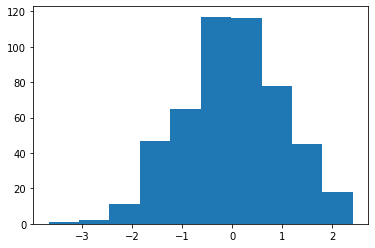

In [29]:
# Campana de Gauss. Datos tipificados y estandarizados
plt.hist(z_group['Age'])

In [30]:
# Si se tienen NA's
fil_na_mean = lambda x : x.fillna(x.mean())

In [31]:
double_group.transform(fil_na_mean)

,Height,Weight,Age,Income
0,203.169661,43.762294,44.0,22840.576617
1,184.927052,33.419614,28.0,18973.923695
2,182.021515,70.723484,31.0,21852.028624
3,160.226086,30.771667,42.0,22101.820713
4,207.571250,108.700513,28.0,18341.146636
...,...,...,...,...
495,119.337668,103.352980,3.0,23432.369948
496,146.308566,44.657406,27.0,17839.309500
497,180.398803,25.738612,59.0,24149.480184
498,147.177181,46.410822,51.0,21641.450268


## Operaciones diversas muy útiles

In [32]:
# Obtener primera fila de cada grupo (6 grupos en total)
double_group.head(1)

,Gender Data,Social Status,Height,Weight,Age,Income
0,Female,Middle Class,203.169661,43.762294,44.0,22840.576617
1,Female,Rich,184.927052,33.419614,28.0,18973.923695
2,Male,Middle Class,182.021515,70.723484,31.0,21852.028624
3,Male,Poor,160.226086,30.771667,42.0,22101.820713
5,Male,Rich,173.899568,123.961893,15.0,21769.254672
8,Female,Poor,168.159596,54.202971,27.0,11156.320380


In [33]:
# Obtener última fila de cada grupo (6 grupos en total)
double_group.tail(1)

,Gender Data,Social Status,Height,Weight,Age,Income
482,Male,Poor,94.339504,38.673869,14.0,17622.156123
484,Female,Poor,115.277716,112.778402,36.0,15913.659354
496,Female,Rich,146.308566,44.657406,27.0,17839.309500
497,Male,Rich,180.398803,25.738612,59.0,24149.480184
498,Male,Middle Class,147.177181,46.410822,51.0,21641.450268
499,Female,Middle Class,162.360943,70.423924,48.0,17344.425445


In [34]:
# Obtener elemento n-ésimo de cada grupo en todo el dataframe, 32 por ejemplo
double_group.nth(32)

Height     Weight   Age        Income
Gender Data Social Status                                           
Female      Middle Class   162.051830  68.624494  37.0  14217.979779
            Poor           171.430740  76.684446  48.0  16826.386787
            Rich           170.782374  52.779208  17.0  22367.748922
Male        Middle Class   136.479245  13.912734  34.0  12966.550966
            Poor           136.715638  95.904837  31.0  13516.502620
            Rich           136.148952  69.301107  18.0  18751.659036

In [36]:
# Si no está la n-ésima fila de un grupo, no aparecerá, por ejemplo
double_group.nth(82)

Height      Weight   Age        Income
Gender Data Social Status                                            
Female      Poor           115.277716  112.778402  36.0  15913.659354
Male        Middle Class   144.666576   22.441923  46.0  15214.183801
            Rich           140.198249   40.415717  33.0  20019.661928

In [47]:
# Antes de crear el objeto groupby, se puede ordenar el dataframe original
data_sorted = data.sort_values(['Age', 'Income'])
# En caso de empate, se agrupa por Income
data_sorted.head(10)

,Gender Data,Social Status,Height,Weight,Age,Income
454,Female,Rich,167.969047,54.628246,-16.0,22448.389316
310,Male,Rich,136.044111,38.429411,-7.0,17221.257493
245,Female,Middle Class,135.648436,94.291691,-0.0,14187.488792
33,Male,Rich,192.489129,120.754255,2.0,23731.490556
124,Male,Middle Class,162.311865,88.193189,3.0,21860.733841
237,Male,Middle Class,219.954076,62.688820,3.0,22402.509017
495,Male,Middle Class,119.337668,103.352980,3.0,23432.369948
317,Male,Poor,173.421240,56.989391,4.0,16330.929920
60,Male,Rich,191.973834,37.498112,4.0,16545.892297
165,Female,Poor,154.237261,79.022196,4.0,24753.360649


In [56]:
# Si se quiere extraer una agrupación por género (más jóvenes)
age_grouped = data_sorted.groupby("Gender Data")
age_grouped.head(1)

,Gender Data,Social Status,Height,Weight,Age,Income
454,Female,Rich,167.969047,54.628246,-16.0,22448.389316
310,Male,Rich,136.044111,38.429411,-7.0,17221.257493


In [55]:
# Si se quisiera encontrar a los más viejos
age_grouped.tail(1)

,Gender Data,Social Status,Height,Weight,Age,Income
350,Female,Poor,161.797394,99.212044,58.0,20573.958622
436,Male,Rich,188.163977,80.411013,61.0,24280.759157


# Conjunto de entrenamiento y conjunto de testing ----------------------------------

Métodos para separar conjuntos de entrenamiento y testing

In [59]:
import pandas as pd

In [60]:
path = "C:/Users/gerar/OneDrive/Documentos/Curso Machine Learning Data Science/python-ml-course-master/datasets"
file = path + "/customer-churn-model/Customer Churn Model.txt"
data = pd.read_csv(file)

In [61]:
len(data)

3333

## Dividir utilizando la distribución normal

In [80]:
a = np.random.randn(len(data))

(array([ 27., 103., 357., 768., 909., 707., 337.,  97.,  25.,   3.]),
 array([-3.10402377, -2.40882084, -1.71361792, -1.01841499, -0.32321206,
         0.37199086,  1.06719379,  1.76239672,  2.45759965,  3.15280257,
         3.8480055 ]),
 <a list of 10 Patch objects>)

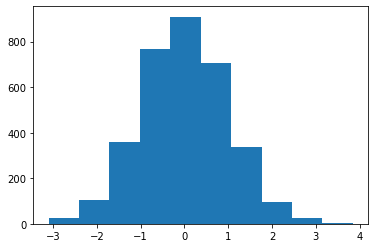

In [93]:
# Distribución normal de los datos
plt.hist(a)

In [156]:
# Array de Trues y Falses dependiendo de los valores que el mismo array acaba de adoptar según la condición

# En este caso se dará un 80% para entrenamiento y 20 % para testing

check = (a<=0.8)
check_int = check.astype(int)

(array([ 677.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2656.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

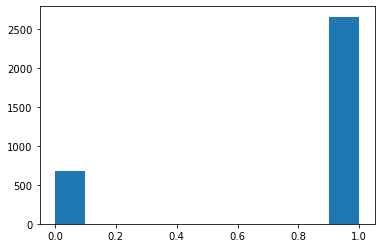

In [157]:
# 20 % Falses, 80 % Trues
plt.hist(check_int)

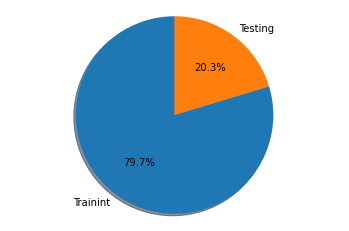

In [158]:
# Pie chart de ambos conjuntos (las raciones se nombran y grafican en sentido antihorario)
 
labels = 'Trainint', 'Testing'
sizes = [(check_int.sum() * 100)/len(a), 100 - (check_int.sum() * 100)/len(a)]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
 
plt.show()

In [159]:
# Conjunto de entrenamiento según si se cumple la condición anterior
training_set = data[check]
testing_set = data[~check]

In [160]:
# Longitud de cada set
print(len(training_set))
print(len(testing_set))

2656
677


## Dividir con la librería sklearn

In [161]:
import sklearn
from sklearn.model_selection import train_test_split

In [162]:
# En esta forma de división no hay reproductibilidad, ya que la función lo separa como sea
train, test = train_test_split(data, test_size = 0.2)

In [163]:
print(len(train))
print(len(test))

2666
667


## Dividir con la función shuffle

In [164]:
import numpy as np
import sklearn

In [165]:
# Primero se mezclan las filas del dataset de forma aleatoria y luego se asignan al training set y testing set
# Usando el shuffle de sklearn
data = sklearn.utils.shuffle(data)

In [166]:
# Convertir límite superior a int
cut_id = int(0.75*len(data))

In [167]:
# 75% training, 25% testing
train_data = data[:cut_id]
test_data = data[cut_id + 1 :]

In [168]:
print(len(train_data))
print(len(test_data))

2499
833
